In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt






In [5]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#Pairplot

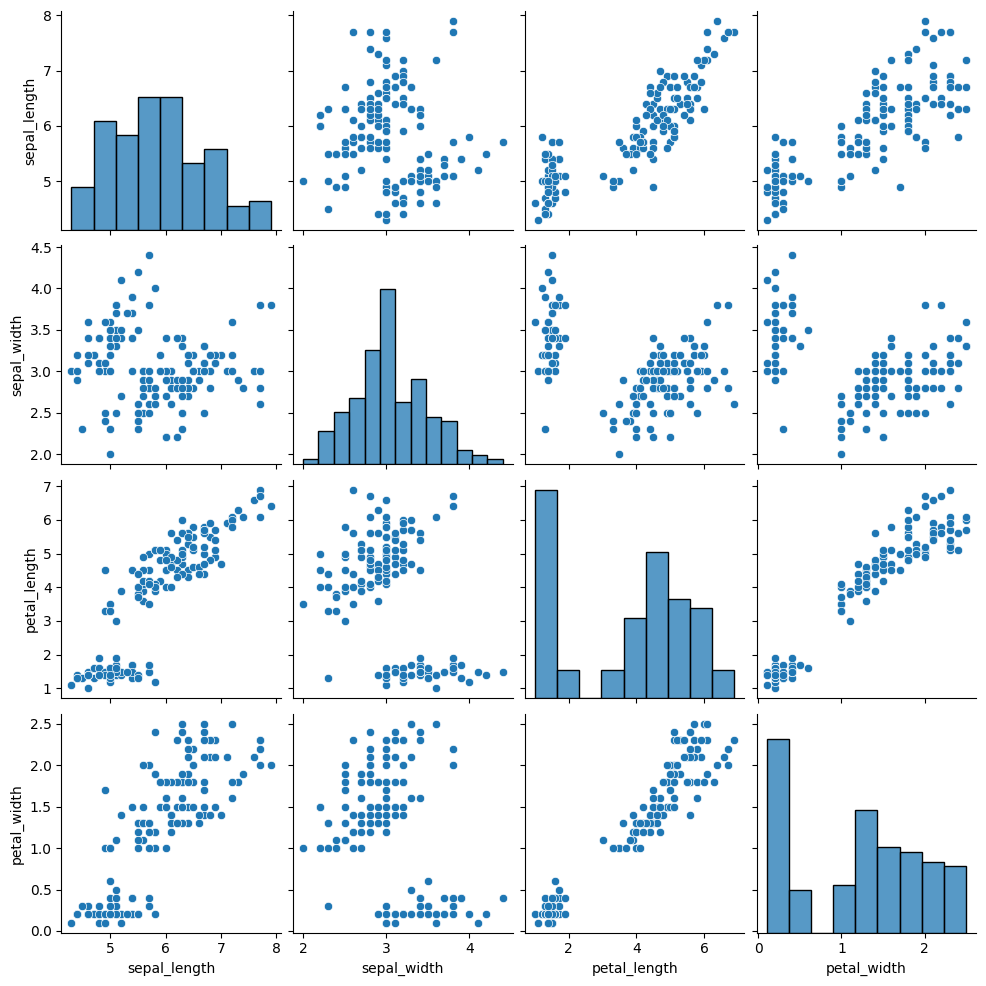

In [7]:
sns.pairplot(iris)
plt.show()


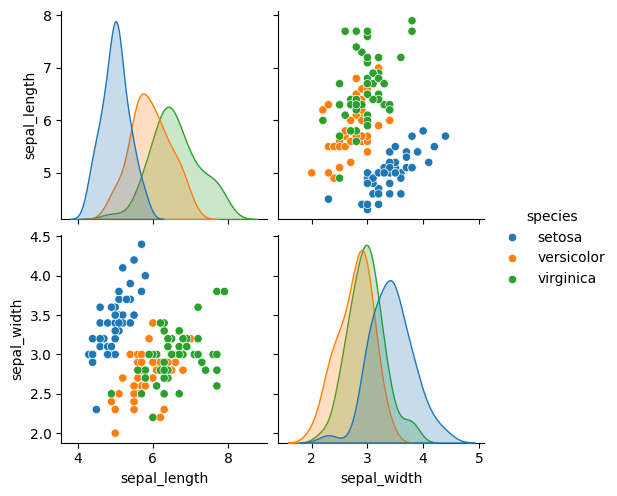

In [9]:
sns.pairplot(iris, vars=["sepal_length", "sepal_width"], hue="species")
plt.show()

#Barplot

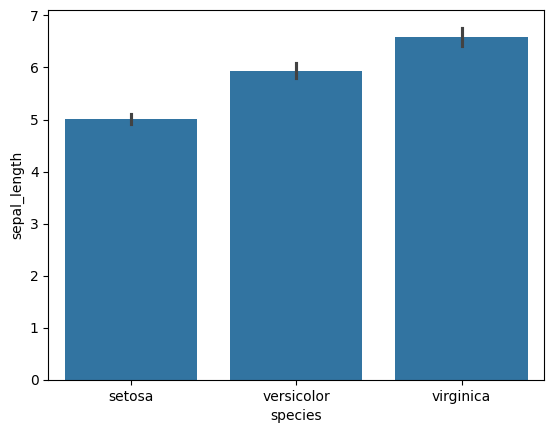

In [10]:
sns.barplot(y="sepal_length", x="species", data=iris, estimator=np.mean)
plt.show()

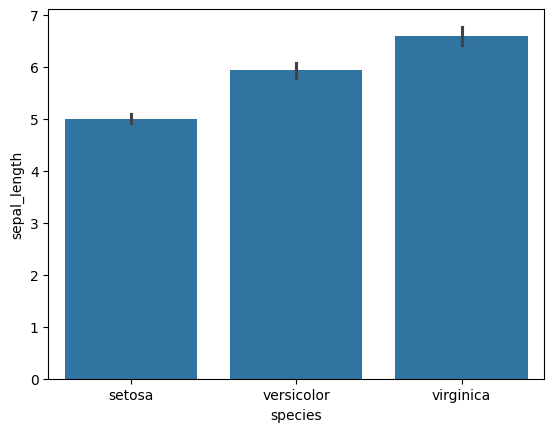

In [15]:
sns.barplot(x=iris["species"], y=iris.iloc[:,0])
plt.show()

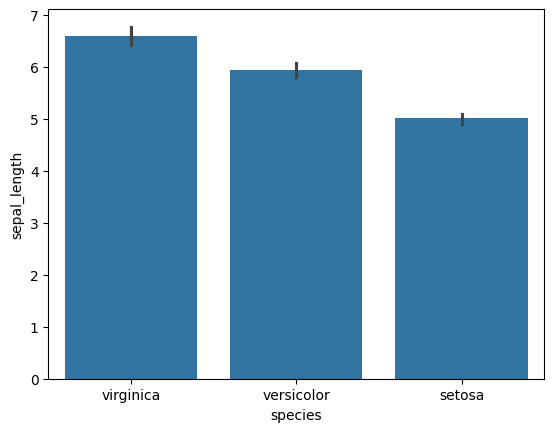

In [17]:
sns.barplot(y="sepal_length", x="species", data=iris, order=["virginica", "versicolor", "setosa"])
plt.show()

In [18]:
df = pd.read_excel("Airbnb_NYC.xlsx", sheet_name="NYC1")
df2 = pd.read_excel("Airbnb_NYC.xlsx", sheet_name="NYC2")

In [19]:
df = pd.merge(left=df, right=df2, on="id")

In [20]:
df.head()

,id,name,host_id,host_name,municipio,barrio,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


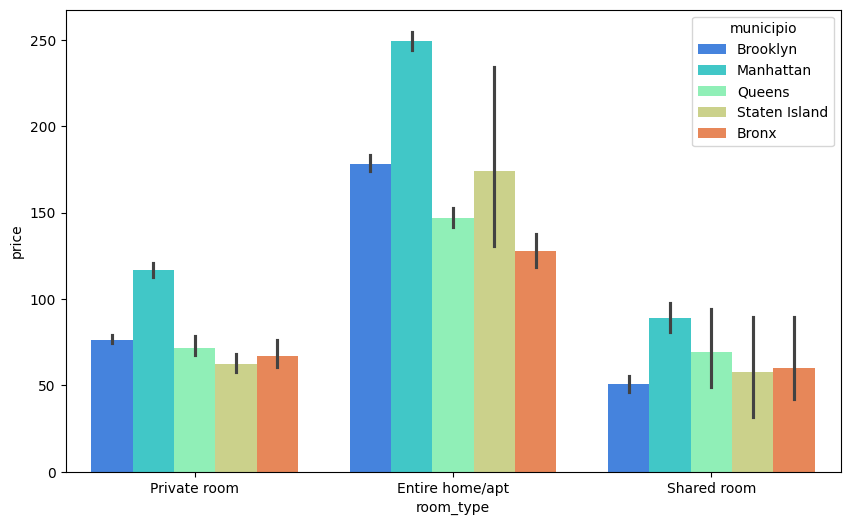

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="room_type", y="price", hue="municipio", data=df, palette="rainbow")
plt.show()

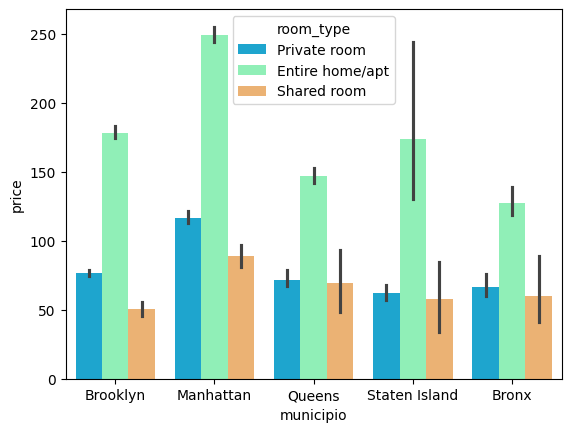

In [32]:
fig, ax = plt.subplots(figsize=(19,6))
sns.barplot(x="municipio", y="price", hue="room_type", data=df, palette="rainbow")
plt.show()

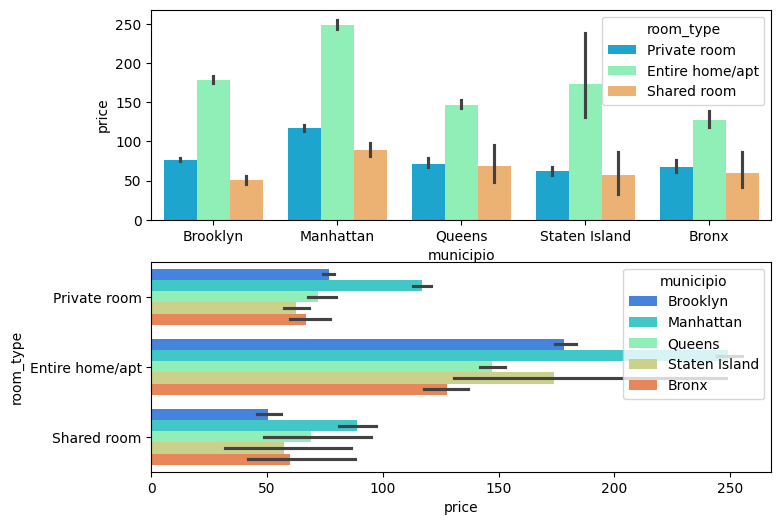

In [37]:
fig, ax = plt.subplots(2,1,figsize=(8,6))
sns.barplot(ax=ax[0], x="municipio", y="price", hue="room_type", data=df, palette="rainbow")
sns.barplot(ax=ax[1], x="price", y="room_type", hue="municipio", data=df, palette="rainbow")
plt.show()

# pandas tiene seaborn incorporado

<Axes: xlabel='room_type'>

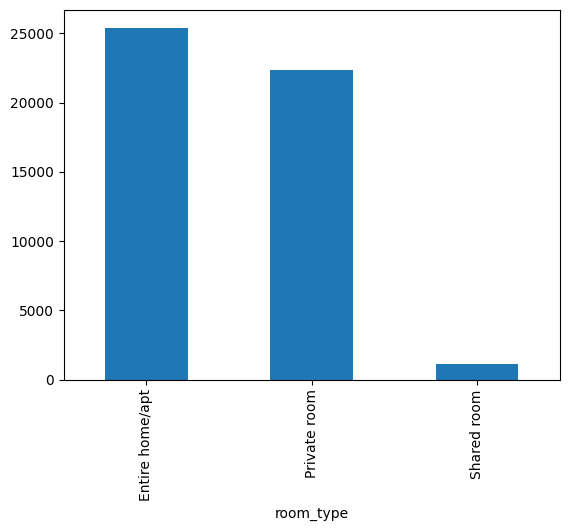

In [40]:
df.groupby("room_type").size().plot(kind="bar")


<Axes: xlabel='room_type'>

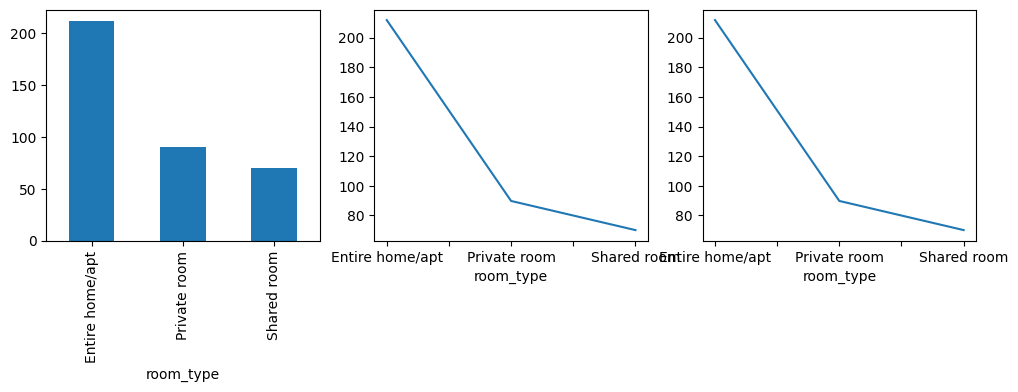

In [45]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1) #1 fila, 3 columnas, subgrafico 1 (el primer gráfico en la primera columna)
df.groupby("room_type")["price"].mean().plot.bar()
plt.subplot(1,3,2) #1 fila, 3 columnas, subgrafico 2 (el segundo gráfico en la segunda columna)
df.groupby("room_type")["price"].mean().plot(kind="line")
plt.subplot(1,3,3) #1 fila, 3 columnas, subgrafico 3 (el tercer gráfico en la segunda columna)
df.groupby("room_type")["price"].mean().plot()

#Countplot

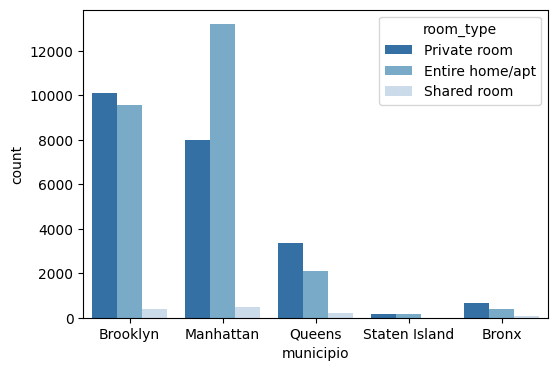

In [47]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="municipio", hue="room_type", data=df, palette="Blues_r")
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


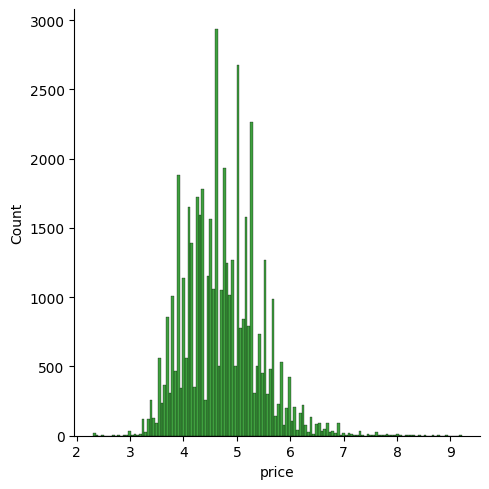

In [49]:
sns.displot(x=np.log(df["price"]), color="green")
plt.show()

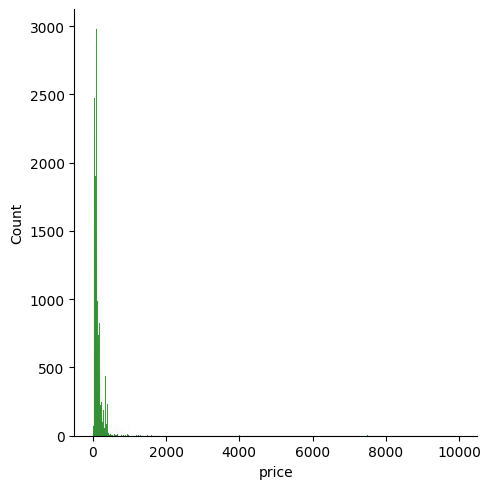

In [50]:
sns.displot(x=(df["price"]), color="green")
plt.show()

#Correlaciones

In [51]:
df[["number_of_reviews", "reviews_per_month", "price"]].corr()

,number_of_reviews,reviews_per_month,price
number_of_reviews,1.000000,0.549868,-0.047954
reviews_per_month,0.549868,1.000000,-0.030608
price,-0.047954,-0.030608,1.000000


<Axes: >

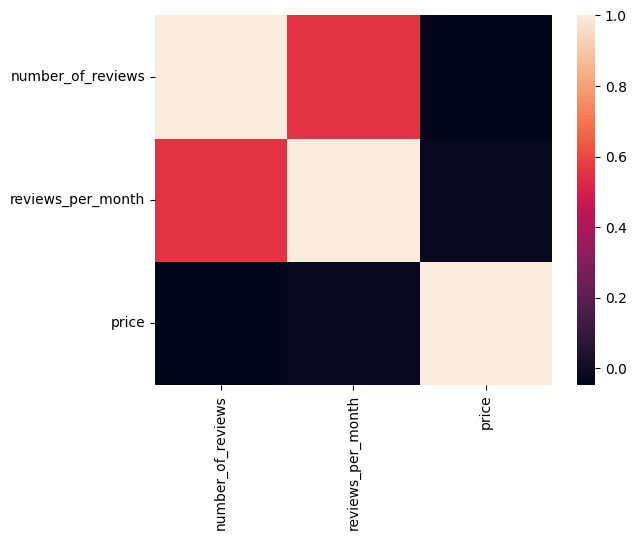

In [52]:
sns.heatmap(df[["number_of_reviews", "reviews_per_month", "price"]].corr())

<Axes: >

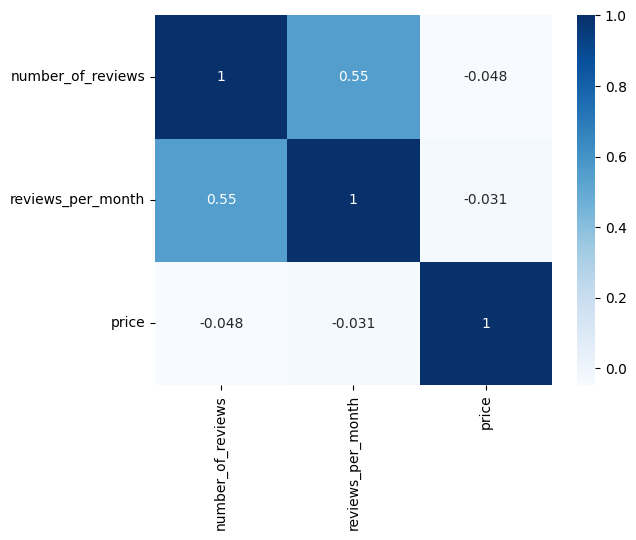

In [58]:
sns.heatmap(df[["number_of_reviews", "reviews_per_month", "price"]].corr(), annot=True, cmap="Blues", annot_kws={"size":10})

# Relplots, Joinplots, Catplots, Regplots

##Relplots

In [59]:
tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


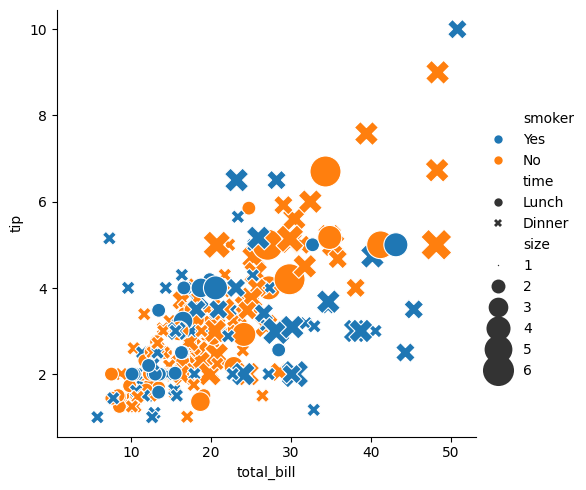

In [66]:
sns.relplot ( x="total_bill", y="tip", hue="smoker", style="time", size="size", sizes=(1,500), height=5, data=tips)

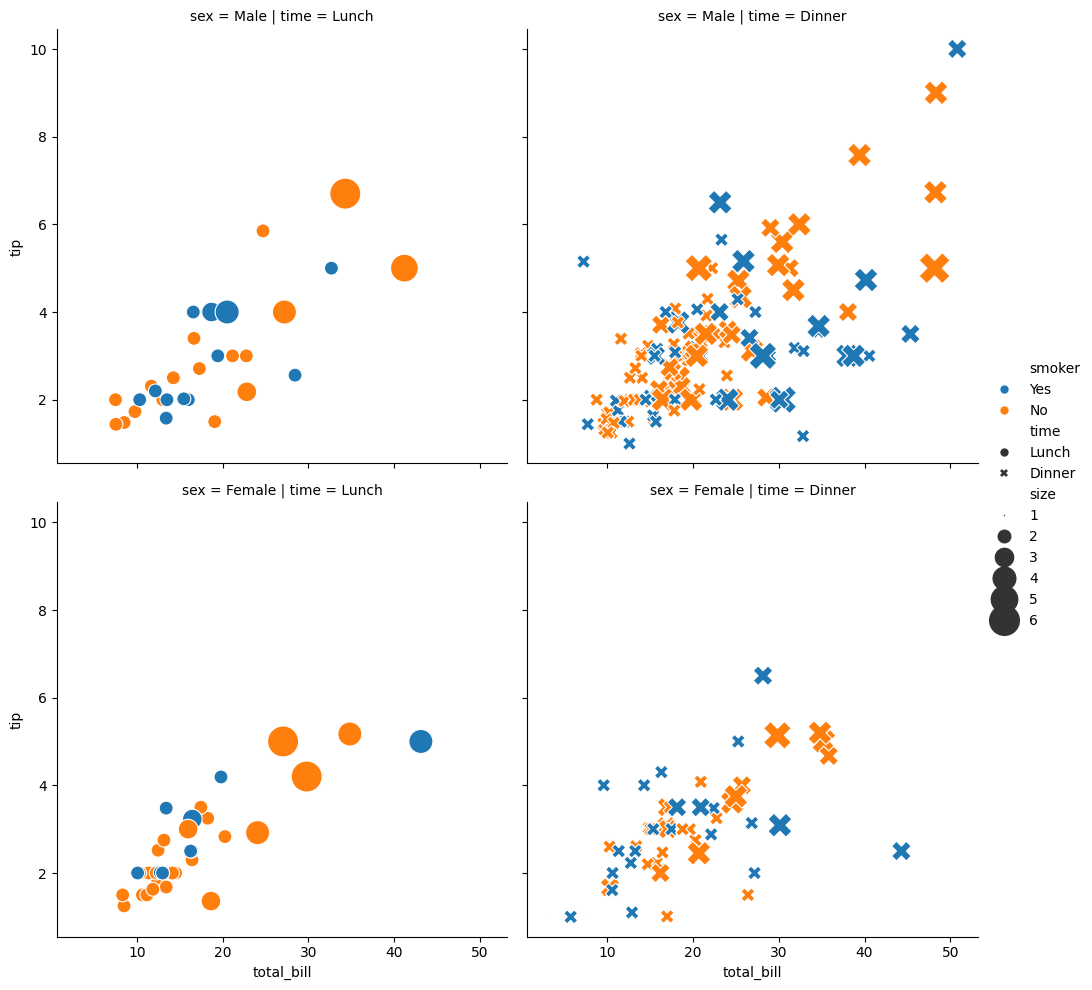

In [75]:
sns.relplot ( x="total_bill", y="tip", hue="smoker", style="time", size="size", sizes=(1,500), height=5, data=tips, col="time", row="sex")

##Joinplots

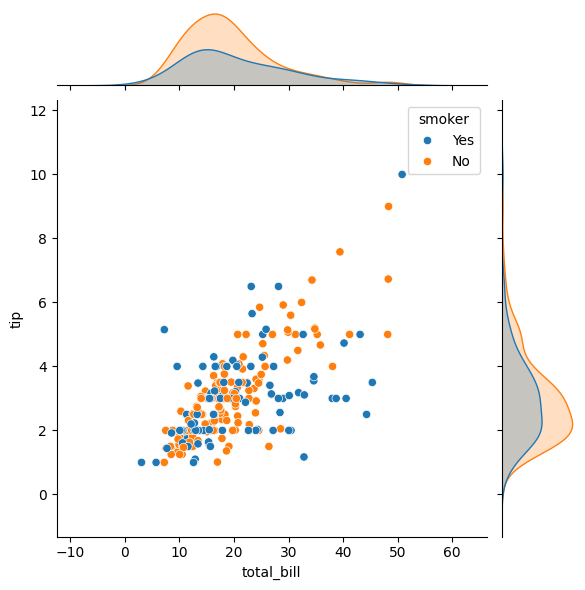

In [76]:
sns.jointplot(x="total_bill", y="tip", hue="smoker", data=tips)

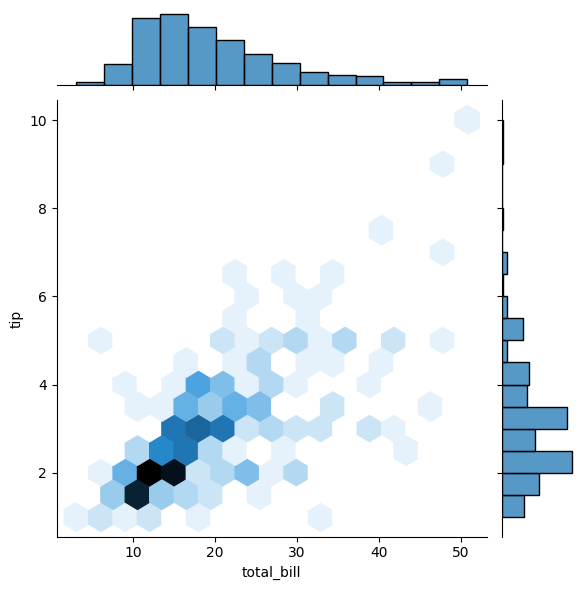

In [78]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex") #hexplot

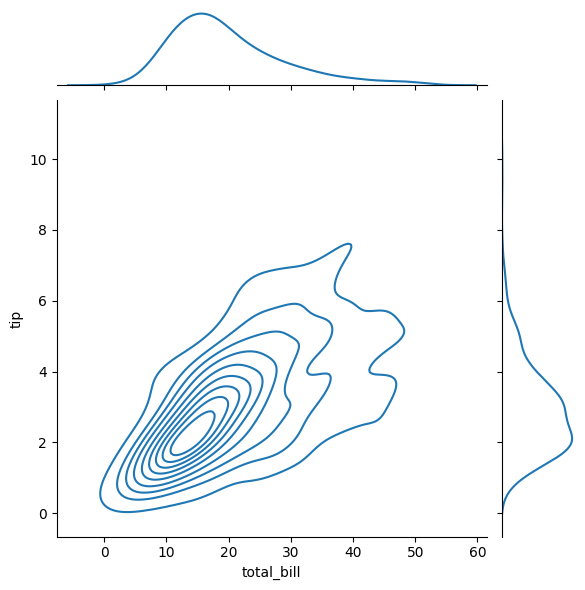

In [79]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde") #kde

<Axes: xlabel='total_bill', ylabel='tip'>

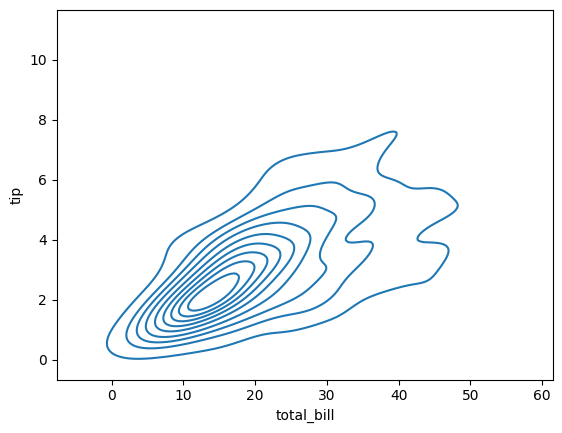

In [81]:
sns.kdeplot(x="total_bill", y="tip", data=tips) #kde

## Catplots

In [82]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


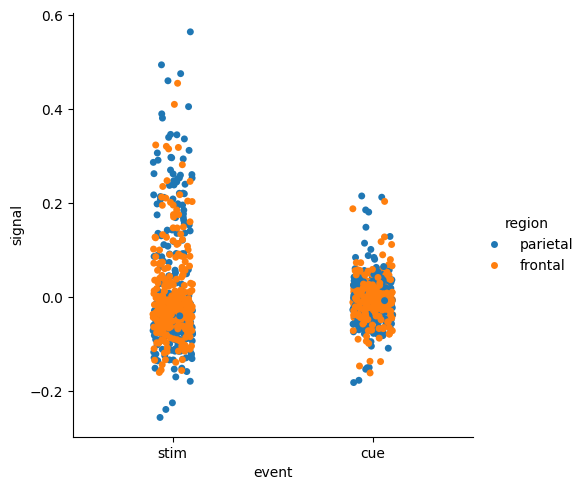

In [83]:
sns.catplot(x="event", y="signal", hue="region", data=fmri)

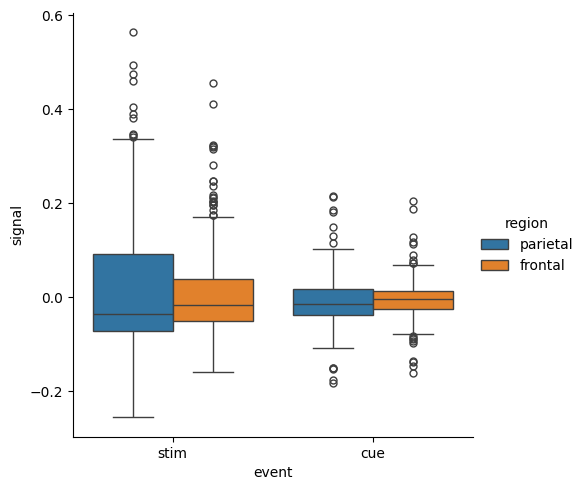

In [84]:
sns.catplot(x="event", y="signal", hue="region", kind="box", data=fmri)

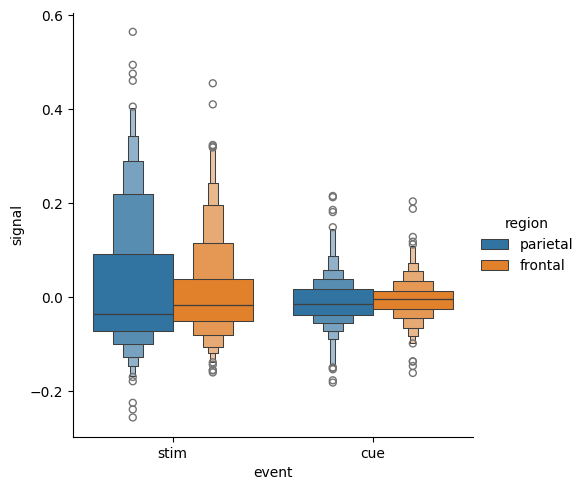

In [85]:
sns.catplot(x="event", y="signal", hue="region", kind="boxen", data=fmri)

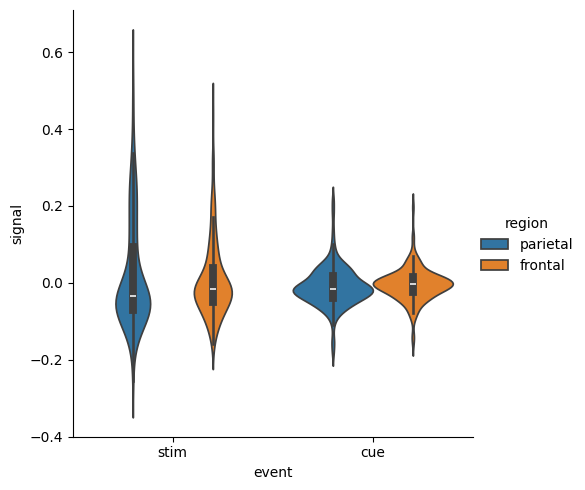

In [86]:
sns.catplot(x="event", y="signal", hue="region", kind="violin", data=fmri)

##Regplots

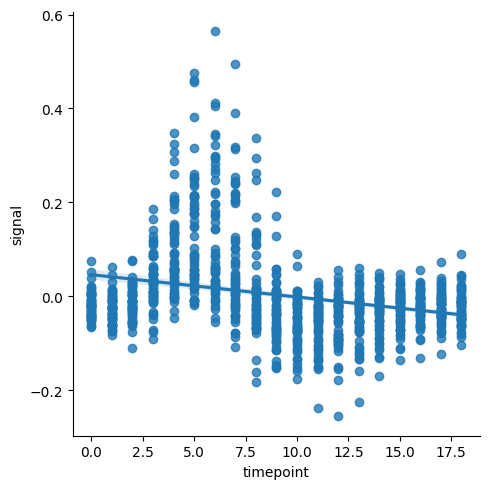

In [90]:
sns.lmplot(x="timepoint", y="signal", data=fmri)

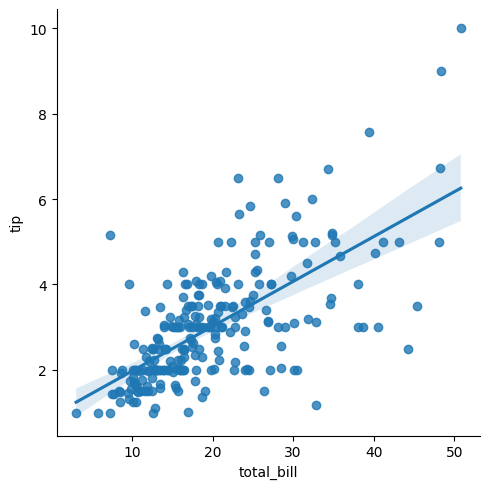

In [93]:
sns.lmplot(x="total_bill", y="tip", data=tips)

